                                             EDA + ETL

LIBRERIAS A IMPORTAR

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


IMPORTACION DE DATASET DE "AccidentesAviones.csv"

In [154]:
datos = pd.read_csv("Datasets\AccidentesAviones.csv")
datos.head()

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,3,"August 06, 1913",?,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,20,?,?,14,?,?,0,The airship flew into a thunderstorm and encou...


In [155]:
datos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              5008 non-null   int64 
 1   fecha                   5008 non-null   object
 2   HORA declarada          5008 non-null   object
 3   Ruta                    5008 non-null   object
 4   OperadOR                5008 non-null   object
 5   flight_no               5008 non-null   object
 6   route                   5007 non-null   object
 7   ac_type                 5008 non-null   object
 8   registration            5008 non-null   object
 9   cn_ln                   5008 non-null   object
 10  all_aboard              5008 non-null   object
 11  PASAJEROS A BORDO       5008 non-null   object
 12  crew_aboard             5008 non-null   object
 13  cantidad de fallecidos  5008 non-null   object
 14  passenger_fatalities    5008 non-null   object
 15  crew

Primero voy a normalizar los nombres de las columnas al Español junto con su correcto tipo de dato y los valores que aparecen con "?" los voy a tomar como datos nulos. En el proceso voy a dropear las columnas que no vaya a utilizar.

In [156]:
datos.rename(columns={"fecha":"Fecha",
                        "HORA declarada":"Hora declarada",           
                        "OperadOR":"Operador",
                        "flight_no": "Numero de vuelo",          
                        "route": "Tipo de vuelo",
                        "ac_type": "Tipo de aeronave",               
                        "registration": "Registro",             
                        "cn_ln": "Codigo de vuelo",
                        "all_aboard": "Total a bordo",
                        "PASAJEROS A BORDO":"Pasajeros a bordo",
                        "crew_aboard":"Personal a bordo",
                        "cantidad de fallecidos": "Cantidad de fallecidos",
                        "passenger_fatalities": "Pasajeros fallecidos",
                        "crew_fatalities": "Personal fallecidos",
                        "ground": "Accidente terrestre",
                        "summary": "Resumen"
                        },inplace=True)

In [157]:
datos['Fecha'] = pd.to_datetime(datos['Fecha'])

# Creo una nueva columna con solo el año y dropeamos la columna Fecha, ya que voy a trabajar con promedios anuales
datos['Año'] = datos['Fecha'].dt.year
datos.drop(columns=["Fecha"],inplace=True)

In [158]:
# veo que los faltantes estan como el string: '?'
# reemplazo por NaN
datos.replace('?', np.nan , inplace=True)


In [159]:
datos.isna().sum()


Unnamed: 0                   0
Hora declarada            1504
Ruta                         5
Operador                    10
Numero de vuelo           3682
Tipo de vuelo              763
Tipo de aeronave            13
Registro                   272
Codigo de vuelo            667
Total a bordo               17
Pasajeros a bordo          221
Personal a bordo           219
Cantidad de fallecidos       8
Pasajeros fallecidos       235
Personal fallecidos        235
Accidente terrestre         44
Resumen                     59
Año                          0
dtype: int64

In [160]:
#Dropeo columnas que ya a previa vista puedo notar que no voy a usar
datos.drop(columns=["Unnamed: 0", "Hora declarada", "Numero de vuelo", "Codigo de vuelo", "Resumen"], inplace=True)


In [161]:
# Y voy a tomar solo las filas que sean !=0 en la columna "Total a bordo" porque si es 0 significaria que no habia pasajeros ni personal a bordo
datos = datos[datos['Total a bordo'] != 0]
#Y si la cantidad de fallecidos es 0, significa que no hubo muertos por ende la fatalidad de pasajeros y tripulantes seria 0
datos['Pasajeros fallecidos'].fillna(datos['Cantidad de fallecidos'].apply(lambda x:0 if x == 0 else np.nan), inplace=True)

In [162]:
datos.isna().sum()

Ruta                        5
Operador                   10
Tipo de vuelo             763
Tipo de aeronave           13
Registro                  272
Total a bordo              17
Pasajeros a bordo         221
Personal a bordo          219
Cantidad de fallecidos      8
Pasajeros fallecidos      235
Personal fallecidos       235
Accidente terrestre        44
Año                         0
dtype: int64

In [163]:
#Dropeamos la columna tipo de vuelo, lo que nos deja col las demas columnas con faltantes menores al 5% de datos totales
datos = datos.drop("Tipo de vuelo", axis=1)
#Eliminamos los datos nulos 
datos = datos.dropna()
datos.isna().sum()

Ruta                      0
Operador                  0
Tipo de aeronave          0
Registro                  0
Total a bordo             0
Pasajeros a bordo         0
Personal a bordo          0
Cantidad de fallecidos    0
Pasajeros fallecidos      0
Personal fallecidos       0
Accidente terrestre       0
Año                       0
dtype: int64

In [164]:
# Convertir las columnas de tipo objeto a tipo numerico
datos['Personal a bordo'] = datos['Personal a bordo'].astype("int64")
datos['Pasajeros a bordo'] = datos['Pasajeros a bordo'].astype("int64")
datos['Pasajeros fallecidos'] = datos['Pasajeros fallecidos'].astype("int64")
datos['Personal fallecidos'] = datos['Personal fallecidos'].astype("int64")
datos["Total a bordo"] = datos["Total a bordo"].astype("int64")
datos["Cantidad de fallecidos"] = datos["Cantidad de fallecidos"].astype("int64")
datos["Accidente terrestre"] = datos["Accidente terrestre"].astype("int64")


In [165]:
datos=datos.reset_index(drop=True)  #-- reseteo los indices

In [166]:
print(datos.isna().sum())
datos.head()

Ruta                      0
Operador                  0
Tipo de aeronave          0
Registro                  0
Total a bordo             0
Pasajeros a bordo         0
Personal a bordo          0
Cantidad de fallecidos    0
Pasajeros fallecidos      0
Personal fallecidos       0
Accidente terrestre       0
Año                       0
dtype: int64


,Ruta,Operador,Tipo de aeronave,Registro,Total a bordo,Pasajeros a bordo,Personal a bordo,Cantidad de fallecidos,Pasajeros fallecidos,Personal fallecidos,Accidente terrestre,Año
0,"Elizabeth, New Jersey",US Aerial Mail Service,De Havilland DH-4,97,1,0,1,1,0,1,0,1918
1,"Cleveland, Ohio",US Aerial Mail Service,De Havilland DH-4,61,1,0,1,1,0,1,0,1919
2,"Dix Run, Pennsylvania",US Aerial Mail Service,De Havilland DH-4,82,1,0,1,1,0,1,0,1919
3,"Cantonsville, Maryland",US Aerial Mail Service,Curtiss R-4LM,32,1,0,1,1,0,1,0,1919
4,"English Channel off Forkstone, Kent",Aircraft Transport and Travel,De Havilland DH-4,G-EAHG,0,0,1,0,0,0,0,1919


In [168]:

# Evaluar y completar los valores en Total a bordo
datos['Total a bordo'] = datos.apply(lambda row: row['Pasajeros a bordo'] + row['Personal a bordo'] if row['Total a bordo'] == 0 else row['Total a bordo'], axis=1)

# Evaluar y completar los valores en Cantidad de fallecidos
datos['Cantidad de fallecidos'] = datos.apply(lambda row: row['Pasajeros fallecidos'] + row['Personal fallecidos'] if row['Cantidad de fallecidos'] == 0 else row['Cantidad de fallecidos'], axis=1)


In [169]:
datos.head()

,Ruta,Operador,Tipo de aeronave,Registro,Total a bordo,Pasajeros a bordo,Personal a bordo,Cantidad de fallecidos,Pasajeros fallecidos,Personal fallecidos,Accidente terrestre,Año
0,"Elizabeth, New Jersey",US Aerial Mail Service,De Havilland DH-4,97,1,0,1,1,0,1,0,1918
1,"Cleveland, Ohio",US Aerial Mail Service,De Havilland DH-4,61,1,0,1,1,0,1,0,1919
2,"Dix Run, Pennsylvania",US Aerial Mail Service,De Havilland DH-4,82,1,0,1,1,0,1,0,1919
3,"Cantonsville, Maryland",US Aerial Mail Service,Curtiss R-4LM,32,1,0,1,1,0,1,0,1919
4,"English Channel off Forkstone, Kent",Aircraft Transport and Travel,De Havilland DH-4,G-EAHG,1,0,1,0,0,0,0,1919


In [170]:
# Calcular la tasa de mortalidad anual para cada año

datos['Tasa_Mortalidad_Anual'] = datos['Cantidad de fallecidos'] / \
    datos['Total a bordo'] * 100


Vamos a ver la cantidad de accidentes por año

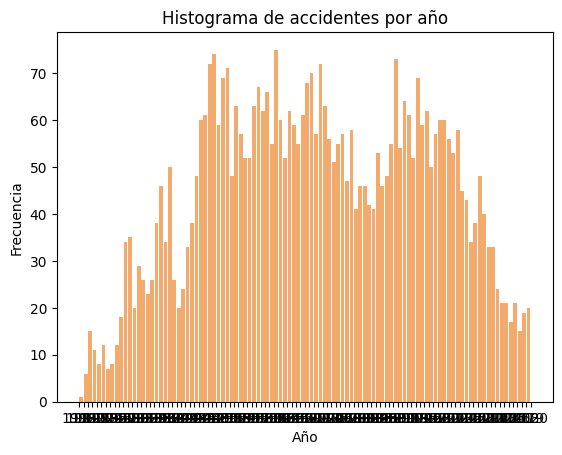

In [171]:
intervalos = range(datos['Año'].min(), datos['Año'].max())

plt.hist(x=datos.Año, bins=intervalos, color='#F2AB6D', rwidth=0.85)
plt.title('Histograma de accidentes por año')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.xticks(intervalos)

plt.show()

Se puede notar la disminucion en la ultima decada.

Ahora vamos a ver los lugares de accidentes en la columna Ruta y normalizarlos para poder usarlos 

In [172]:
datos.Ruta.unique()

array(['Elizabeth, New Jersey', 'Cleveland, Ohio',
       'Dix Run, Pennsylvania', ..., 'Near Kaduna, Nigeria',
       'Near Pyin Oo Lwin, Myanmar', 'Palana, Russia'], dtype=object)

In [173]:
datos['Ruta'] = datos['Ruta'].str.replace(', ', ',')
datos['Ruta'] = datos['Ruta'].str.replace('Over ', '')
datos['Ruta'] = datos['Ruta'].str.replace('Near ', '')
datos['Ruta'] = datos['Ruta'].str.replace('Off ', '')

In [174]:
datos['Ruta'] = datos['Ruta'].str.replace('Jambol,Bulgeria', 'Jambol,Bulgaria')
datos['Ruta'] = datos['Ruta'].str.replace(',North Sea', '')
datos['Ruta'] = datos['Ruta'].str.replace('Cantonsville,Maryland', 'Catonsville,Maryland')
datos['Ruta'] = datos['Ruta'].str.replace('English Channel off Forkstone,Kent', 'Folkestone,Kent')
datos['Ruta'] = datos['Ruta'].str.replace('Catherham,Surrey,UK', 'Caterham,Surrey,UK')
datos['Ruta'] = datos['Ruta'].str.replace('Hillersburg,Pennsylvania', 'Millersburg,Pennsylvania')
datos['Ruta'] = datos['Ruta'].str.replace('Mendotta,Minnisota', 'Mendota,Minnesota')
datos['Ruta'] = datos['Ruta'].str.replace('Brawnson,Nebraska', 'Brownson,Nebraska')
datos['Ruta'] = datos['Ruta'].str.replace('La Rache,Morocco', 'LaRache,Morocco')
datos['Ruta'] = datos['Ruta'].str.replace('the Panama coast', 'the Panama')
datos['Ruta'] = datos['Ruta'].str.replace('the Gulf of Finland', 'Gulf of Finland')
datos['Ruta'] = datos['Ruta'].str.replace('Desertores Island Región de Los Lagos','Desertores Island')
datos['Ruta'] = datos['Ruta'].str.replace('Pavillon,New York', 'Pavilion,New York')
datos['Ruta'] = datos['Ruta'].str.replace('the coast of France', 'France')
datos['Ruta'] = datos['Ruta'].str.replace('Territory of New Guinea', 'New Guinea')
datos['Ruta'] = datos['Ruta'].str.replace('Santiago del Estado,Argentina', 'Santiago del Estero,Argentina')
datos['Ruta'] = datos['Ruta'].str.replace('the North Atlantic', 'North Atlantic')
datos['Ruta'] = datos['Ruta'].str.replace('North of San Juan,Puerto Rico', 'San Juan,Puerto Rico')
datos['Ruta'] = datos['Ruta'].str.replace('Barajas,Madrid,Spain', 'Barajas,Madrid,España')
datos['Ruta'] = datos['Ruta'].str.replace('Mt. Butler,Hong Kong', 'Mount Butler,Hong Kong',regex=True)


In [175]:
datos['Operador'].value_counts().head(10)

Operador
Aeroflot                           239
Military - U.S. Air Force          128
Air France                          64
Deutsche Lufthansa                  61
United Air Lines                    43
Pan American World Airways          40
Military - U.S. Army Air Forces     40
American Airlines                   35
Indian Airlines                     34
KLM Royal Dutch Airlines            34
Name: count, dtype: int64

Cantidad de accidentes por operador.
El operador Aeroflot es el que mas accidentes a tenido,la aerolinea mas peligrosa.
El operador de ejercito con mas accidentes es Military US Air Force

In [115]:
#Guardo las transformaciones en nuevo archivo CSV
datos.to_csv("Datasets/PasajerosAvion.csv")